In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
!pwd

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/reillyn51/340wProject.git

fatal: destination path '340wProject' already exists and is not an empty directory.


In [ ]:
!cd drive/MyDrive/

/bin/bash: line 0: cd: drive/MyDrive/: No such file or directory


In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('340wProject/data/Beat the bookies/closing_odds.csv')
df.head()

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
1,170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
2,170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
3,170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
4,170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9


In [23]:
# calculate the Kelly criterion column
subset = df[['match_id','home_score','away_score','max_odds_home_win']]
subset['home_win'] = np.where(subset['home_score'] > subset['away_score'], True, False) # outcome column
subset['p_cons'] =  1/df['avg_odds_home_win'] #probability of an event happening
p_unfavorable_cons = 1 - subset['p_cons'] 
b = df['max_odds_home_win'] # ?
subset['kelly_criterion_percent'] = subset['p_cons'] - (p_unfavorable_cons / b)
# subset['p_cons']

<ipython-input-23-85dfd3aba3b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['home_win'] = np.where(subset['home_score'] > subset['away_score'], True, False) # outcome column
<ipython-input-23-85dfd3aba3b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['p_cons'] =  1/df['avg_odds_home_win'] #probability of an event happening
<ipython-input-23-85dfd3aba3b1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [24]:
# Calculating the expected payout for each game
alpha = .034 #constant that depends on victory (0.034 for home win)
omega = df['max_odds_home_win'] # odds paid out by the bookmaker
subset['E(pi)'] = (subset['p_cons'] - alpha) * omega-1 #
# print(subset.shape, subset.columns)

<ipython-input-24-8239cdd5f15f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['E(pi)'] = (subset['p_cons'] - alpha) * omega-1 #


In [25]:
from pickle import TRUE
# create a column that holds booleans corresponding to when to place a bet 
subset['place_bet'] = np.where(subset['E(pi)'] > 0, True, False) # outcome column

<ipython-input-25-db0d4597c335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['place_bet'] = np.where(subset['E(pi)'] > 0, True, False) # outcome column


In [26]:
# Calculate profit for Kelly criterion 
initial_wealth_2 = 500
wealth_2 = []
subset_2 = subset
starting_salary = initial_wealth_2 * len(subset_2)
for i in range(len(subset)):
  
  if subset['place_bet'][i] == True: 
    if subset['home_win'][i] == True:
      # bet placed and won, wealth then gets increased by bet payout
        wealth_2.append(initial_wealth_2 * subset_2['kelly_criterion_percent'][i] * subset_2['max_odds_home_win'][i] + ( initial_wealth_2 - (initial_wealth_2 * subset_2['kelly_criterion_percent'][i])))
    else:
        # bet placed and lost, wealth decreases by amount bet
        wealth_2.append(initial_wealth_2 - (initial_wealth_2 * subset_2['kelly_criterion_percent'][i]))
      
  else:
      # bet not placed, we keep the 500 dollars that would have been bet
      wealth_2.append(500)

# add the wealth for the kelly criterion to the dataset
subset['wealth'] = wealth_2

<ipython-input-26-a9fddf2aada2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['wealth'] = wealth_2


In [27]:
# calculate the total profit
print(sum(subset_2['wealth']) - starting_salary)

319204.91723391414


In [28]:
# modern portfolio theory calculation
# change the place_bet to be different here

# define the thresholds being tested
thresholds = [.05,.1,.15,.25,.45]
# define dictionary to hold lists to be plotted
plotting_dictionary = {}
plot_types = ['.','o','p','^','+']
# define flat amount of wealth that will be used for the bet amount when placing a bet
bet_percentage = .1
initial_wealth_mpt = 500
subset_mpt = subset
for threshold in thresholds:
  # instantiate variables
  bet_counter = 0
  wealth_mpt = []
  wealth_mpt_for_dataset = []
  place_bet_mpt = []
  # bet 1% of wealth on game if the outcome of the bet winning is greater than or equal increasing the wealth by 10% of the portfolio 
  for i in range(len(subset_mpt)):
    # if we are evaluating the first game to see if we should bet on it
    if len(wealth_mpt) == 0:
      percentage_increase = bet_percentage * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i] / (initial_wealth_mpt + bet_percentage * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i])
      # if the potential increase in wealth is greater than the threshold and our number of bets is less than our bet threshold
      if percentage_increase > threshold and bet_counter < 500:
        place_bet_mpt.append(True)
        bet_counter += 1
        if subset_mpt['home_win'][i] == True:
          # bet placed and won, wealth then gets increased by bet payout
          wealth_mpt.append(initial_wealth_mpt + bet_percentage * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i])
          wealth_mpt_for_dataset.append(initial_wealth_mpt + bet_percentage * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i])
        else:
          # bet placed and lost, wealth then decreases by bet
          wealth_mpt.append(initial_wealth_mpt - bet_percentage * initial_wealth_mpt)
          wealth_mpt_for_dataset.append(initial_wealth_mpt - bet_percentage * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i])
      else:
        # bet not placed, we keep the initial wealth constant
        place_bet_mpt.append(False)
        wealth_mpt_for_dataset.append(initial_wealth_mpt)
    else:
      # if we are evaluating any game other than the first game
      percentage_increase = bet_percentage * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i] / (int(wealth_mpt[-1]) + bet_percentage * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i])
      # if the potential increase in wealth is greater than the threshold and our number of bets is less than our bet threshold
      if percentage_increase > threshold and bet_counter < 500:
        place_bet_mpt.append(True)
        bet_counter += 1
        if subset_mpt['home_win'][i] == True:
          # bet placed and won, wealth then gets increased by bet payout
          wealth_mpt.append(int(wealth_mpt[-1]) + bet_percentage * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i])
          wealth_mpt_for_dataset.append(int(wealth_mpt[-1]) + bet_percentage * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i])
        else: 
          # bet placed and lost, wealth then decreases by bet
          wealth_mpt.append(int(wealth_mpt[-1]) - bet_percentage * int(wealth_mpt[-1])) 
          wealth_mpt_for_dataset.append(int(wealth_mpt[-1]) - bet_percentage * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i])
      else:
        # bet not placed, we keep the initial wealth constant
        place_bet_mpt.append(False)
        wealth_mpt_for_dataset.append(int(wealth_mpt[-1]))

  place_bet_column_name = f'place_bet_mpt_{threshold}'
  wealth_column_name = f'wealth_for_{threshold}_mpt'
  # adding information to the subset dataframe
  subset[place_bet_column_name] = place_bet_mpt
  subset[wealth_column_name] = wealth_mpt_for_dataset
  index = thresholds.index(threshold)
  # adding wealth list for that threshold to the plotting dictionary
  plotting_dictionary[plot_types[index]] = wealth_mpt

<ipython-input-28-b49eb686539e>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[place_bet_column_name] = place_bet_mpt
<ipython-input-28-b49eb686539e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[wealth_column_name] = wealth_mpt_for_dataset
<ipython-input-28-b49eb686539e>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Overall profit for a threshold of .15:  1785623.4
Average profit gained per bet:  3570.2468


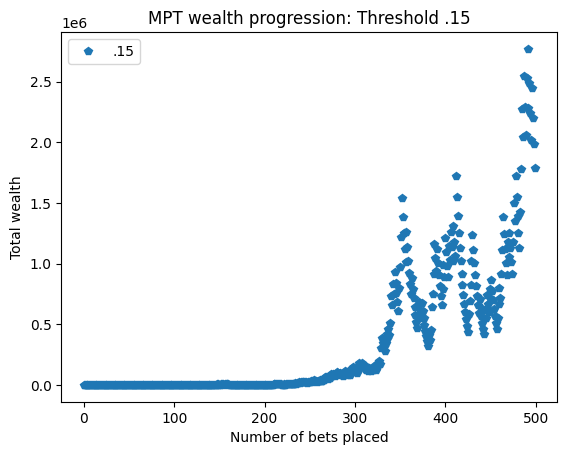

In [29]:
# plotting wealth progression for a threshold of .15 for MPT strategy
import matplotlib.pyplot as plt
print('Overall profit for a threshold of .15: ', plotting_dictionary['p'][-1])
print('Average profit gained per bet: ', (plotting_dictionary['p'][-1] - 500) / len(plotting_dictionary['p']))
plt.plot(plotting_dictionary['p'], 'p', label='.15')
plt.legend(loc='upper left')
plt.title('MPT wealth progression: Threshold .15')
plt.xlabel('Number of bets placed')
plt.ylabel('Total wealth')
plt.savefig('340wProject/MPTWealthProgression_.15.png')
plt.show()

Overall profit for a threshold of .25:  0.9
Average profit gained per bet for a threshold of .25:  -3.1
Overall profit for a threshold of .45:  0.9
Average profit gained per bet for a threshold of .45:  -10.185714285714287


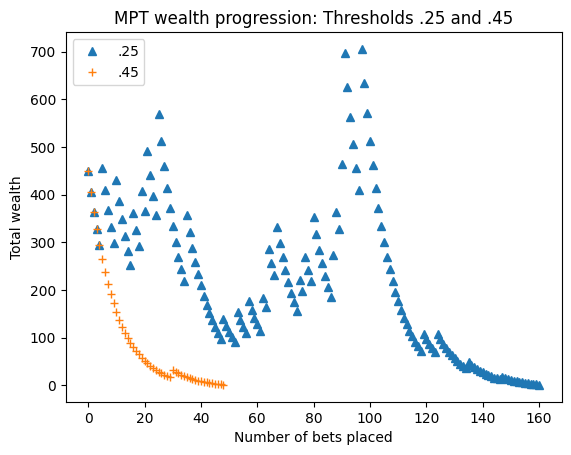

In [30]:
# plotting wealth progression for a threshold of .25 and .45 for MPT strategy
print('Overall profit for a threshold of .25: ', plotting_dictionary['^'][-1])
print('Average profit gained per bet for a threshold of .25: ', (plotting_dictionary['^'][-1] - 500) / len(plotting_dictionary['^']))
print('Overall profit for a threshold of .45: ', plotting_dictionary['+'][-1])
print('Average profit gained per bet for a threshold of .45: ', (plotting_dictionary['+'][-1] - 500) / len(plotting_dictionary['+']))
plt.plot(plotting_dictionary['^'], '^', label='.25')
plt.plot(plotting_dictionary['+'], '+', label='.45')
plt.legend(loc='upper left')
plt.title('MPT wealth progression: Thresholds .25 and .45')
plt.xlabel('Number of bets placed')
plt.ylabel('Total wealth')
plt.savefig('340wProject/MPTWealthProgression_.25_.45.png')
plt.show()

Overall profit for a threshold of .05:  945561421.8
Average profit gained per bet for a threshold of .05:  1891121.8435999998
Overall profit for a threshold of .10:  865827275.04
Average profit gained per bet for a threshold of .10:  1731653.55008


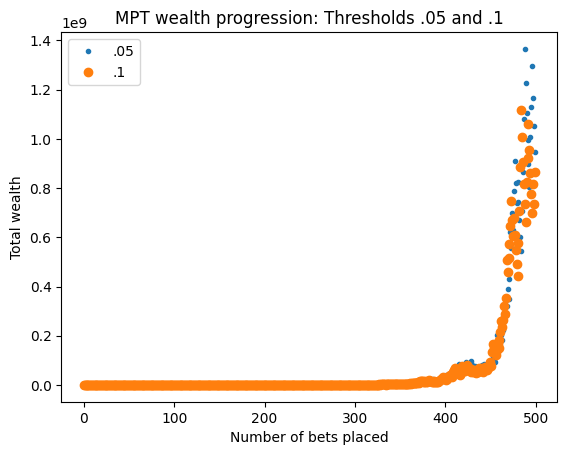

In [31]:
# plotting wealth progression for a threshold of .05 and .1 for MPT strategy
print('Overall profit for a threshold of .05: ', plotting_dictionary['.'][-1])
print('Average profit gained per bet for a threshold of .05: ', (plotting_dictionary['.'][-1] - 500) / len(plotting_dictionary['.']))
print('Overall profit for a threshold of .10: ', plotting_dictionary['o'][-1])
print('Average profit gained per bet for a threshold of .10: ', (plotting_dictionary['o'][-1] - 500) / len(plotting_dictionary['o']))
plt.plot(plotting_dictionary['.'], '.', label='.05')
plt.plot(plotting_dictionary['o'], 'o', label='.1')
plt.legend(loc='upper left')
plt.title('MPT wealth progression: Thresholds .05 and .1')
plt.xlabel('Number of bets placed')
plt.ylabel('Total wealth')
plt.savefig('340wProject/MPTWealthProgression_.05_.1.png')
plt.show()

In [32]:
# Maximum kelly fractional criterion calculation
subset['kelly_frac_max'] = np.where(subset['kelly_criterion_percent'] < 0.5, True, False) # outcome column
display(subset)


,match_id,home_score,away_score,max_odds_home_win,home_win,p_cons,kelly_criterion_percent,E(pi),place_bet,wealth,...,wealth_for_0.05_mpt,place_bet_mpt_0.1,wealth_for_0.1_mpt,place_bet_mpt_0.15,wealth_for_0.15_mpt,place_bet_mpt_0.25,wealth_for_0.25_mpt,place_bet_mpt_0.45,wealth_for_0.45_mpt,kelly_frac_max
0,170088,0,1,3.20,False,0.333957,0.125818,-0.040138,False,500.000000,...,3.400000e+02,True,3.400000e+02,True,340.000,False,500.0,False,500.0,True
1,170089,3,1,2.04,True,0.513980,0.275735,-0.020840,False,500.000000,...,6.513640e+02,True,6.513640e+02,True,651.364,False,500.0,False,500.0,True
2,170090,1,0,2.00,True,0.539898,0.309848,0.011797,True,654.923874,...,7.788000e+02,True,7.788000e+02,True,778.800,False,500.0,False,500.0,True
3,170091,1,1,1.67,False,0.620270,0.392887,-0.020928,False,500.000000,...,4.864720e+02,True,4.864720e+02,False,649.000,False,500.0,False,500.0,True
4,170092,1,3,7.00,False,0.167006,0.048007,-0.068956,False,500.000000,...,1.575000e+02,True,1.575000e+02,True,175.200,True,150.0,False,500.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,1,2,1.83,False,0.593895,0.371979,0.024607,True,314.010334,...,9.455614e+08,False,8.658273e+08,False,1785623.000,False,0.0,False,0.0,True
479436,876807,1,1,19.00,False,0.076240,0.027621,-0.197443,False,500.000000,...,9.455614e+08,False,8.658273e+08,False,1785623.000,False,0.0,False,0.0,True
479437,876808,0,5,22.00,False,0.058053,0.015237,-0.470831,False,500.000000,...,9.455614e+08,False,8.658273e+08,False,1785623.000,False,0.0,False,0.0,True
479438,876809,0,3,34.00,False,0.063636,0.036096,0.007634,True,481.951901,...,9.455614e+08,False,8.658273e+08,False,1785623.000,False,0.0,False,0.0,True


In [33]:
# Calculate profit for maximum kelly criterion
initial_wealth_kfm = 500
wealth_kfm = []
subset_kfm = subset
starting_salary = initial_wealth_kfm * len(subset_kfm)
for i in range(len(subset_kfm)):
  if subset['place_bet'][i] == True: 
    if subset['kelly_frac_max'][i] == True: 
      if subset['home_win'][i] == True:
          # if place_bet == True and kelly_frac_max == True and home team wins
          # bet placed and won, wealth then gets increased by bet payout
          wealth_kfm.append(initial_wealth_kfm * subset_kfm['kelly_criterion_percent'][i] * subset_kfm['max_odds_home_win'][i] + ( initial_wealth_kfm - (initial_wealth_kfm * subset_kfm['kelly_criterion_percent'][i])))
      else:
        # bet placed and lost, wealth then decreases by bet amount
        wealth_kfm.append(initial_wealth_kfm - (initial_wealth_kfm * subset_kfm['kelly_criterion_percent'][i]))
    else:
        # bet not placed, keep the 500 dollars
        wealth_kfm.append(500)
  else:
    # bet not placed, keep the 500 dollars
    wealth_kfm.append(500)
subset_kfm['wealth'] = wealth_kfm


In [34]:
print(len(subset_kfm), len(subset))

479440 479440


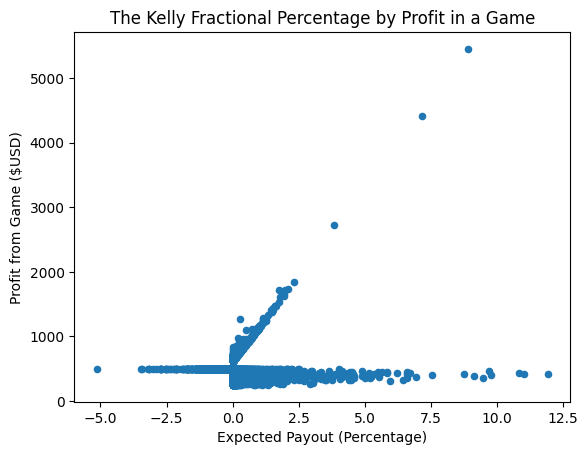

In [39]:
# plotting profit from game vs the expected payout for kelly fractional max strategy
subset.plot(x='E(pi)', y='wealth', kind='scatter')
plt.xlabel('Expected Payout (Percentage)')
plt.ylabel('Profit from Game ($USD)')
plt.title('The Kelly Fractional Percentage by Profit in a Game')
plt.savefig('340wProject/KellyFracProfitperGame.png')
plt.show()

In [35]:
# adding kelly_frac_max_wealth to subset
subset['wealth_kfm'] = wealth_kfm

In [37]:
# finding total profit for kelly frac max
print(sum(subset_kfm['wealth']) - starting_salary)
true_count_kelly_max = subset.kelly_frac_max.sum()
print(true_count_kelly_max)

169113.72534826398
422406


In [40]:
subset.to_csv('340wProject/ResultingDataset.csv')